In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from model.human import Human

In [6]:
sim_histories = []
# Read the history from the pickle
with open('./tmp/history.pkl', 'rb') as f:
    while True:
        try:
            sim_histories.append(pkl.load(f))
        except EOFError:
            break
        
print("Number of simulations: ", len(sim_histories))
print("Number of keys per simulation: ", len(sim_histories[0]))
print("Number of timesteps per simulation: ", len(sim_histories[0]['reward']))
print("Keys: ", sim_histories[0].keys())

Number of simulations:  28
Number of keys per simulation:  10
Number of timesteps per simulation:  35040
Keys:  dict_keys(['out_tmp', 'air_tmp', 'opr_tmp', 'air_hum', 'htg_stp', 'clg_stp', 'eeq_htg', 'air_chg', 'rad_tmp', 'reward'])


In [9]:
# combine all dicts in sim_histories into one dict
sim_histories_combined = {}
for key in sim_histories[0].keys():
    sim_histories_combined[key] = np.concatenate([sim_histories[i][key] for i in range(len(sim_histories))])

print("Keys in the history: ", sim_histories_combined.keys())
print("Number of total timesteps: ", len(sim_histories_combined['reward']))

Keys in the history:  dict_keys(['out_tmp', 'air_tmp', 'opr_tmp', 'air_hum', 'htg_stp', 'clg_stp', 'eeq_htg', 'air_chg', 'rad_tmp', 'reward'])
Number of total timesteps:  981120


In [10]:
# create humans parallel to the training setup for pmv calculation
humans = [Human()]
sim_histories_combined['pmv'] = []
# calculate the pmv for each timestep
for i in range(len(sim_histories_combined['reward'])):
    pmvs = []
    for h in humans:
        pmvs.append(h.calcpmv(
            tdb=sim_histories_combined['air_tmp'][i],
            tr=sim_histories_combined['rad_tmp'][i],
            v=0.1,
            rh=sim_histories_combined['air_hum'][i],
        ))
    sim_histories_combined['pmv'].append(pmvs)
print("Number of total timesteps: ", len(sim_histories_combined['pmv']))

/home/l4/.cache/pypoetry/virtualenvs/rl-energyplus-hi-YszVVEjS-py3.10/lib/python3.10/site-packages/pythermalcomfort/models/cooling_effect.py:127: UserWarning: Assuming cooling effect = 0 since it could not be calculated for this set of inputs tdb=39.90063731611387, tr=32.13832728615547, rh=27.8021978853542, vr=0.22, clo=0.974, met=1.4
  warnings.warn(
/home/l4/.cache/pypoetry/virtualenvs/rl-energyplus-hi-YszVVEjS-py3.10/lib/python3.10/site-packages/pythermalcomfort/models/cooling_effect.py:127: UserWarning: Assuming cooling effect = 0 since it could not be calculated for this set of inputs tdb=39.99336081623003, tr=34.41734600315502, rh=24.4417120687005, vr=0.22, clo=0.974, met=1.4
  warnings.warn(
/home/l4/.cache/pypoetry/virtualenvs/rl-energyplus-hi-YszVVEjS-py3.10/lib/python3.10/site-packages/pythermalcomfort/models/cooling_effect.py:127: UserWarning: Assuming cooling effect = 0 since it could not be calculated for this set of inputs tdb=39.920253227938176, tr=33.86187944479849, rh=

Number of total timesteps:  981120


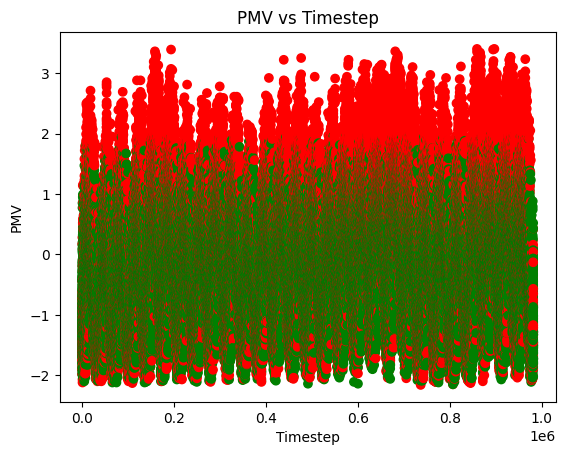

In [11]:
# Extract the relevant data
pmv_values = sim_histories_combined['pmv']
rewards = sim_histories_combined['reward']

# Create a list to store the colors
colors = ['red' if reward == -1 else 'green' for reward in rewards]

# Plot the PMV vs timestep
plt.scatter(range(len(pmv_values)), pmv_values, c=colors)

# Set the labels and title
plt.xlabel('Timestep')
plt.ylabel('PMV')
plt.title('PMV vs Timestep')

# Show the plot
plt.show()